In [1]:

from circuits.circuit_mobjects import *
import circuits.theoretical as tl
# from get_circuits import *
# import ElectricCircuitsManim.circuits as circuits
from manim import *

Manim Community v0.15.2

In [2]:
%%manim -v WARNING -qm --flush_cache CircuitsTest2 

class CircuitsTest2(Scene):
    def construct(self):
        circuit = tl.ACCircuit(nodes=9, w=1)
        circuit.add(tl.Wire(0, 1))
        circuit.add(tl.Wire(1, 2))
        circuit.add(tl.IndependantVoltage(v=5, head=3, tail=0))
        # circuit.add(tl.Resistor(r=1, head=4, tail=1))
        # circuit.add(tl.Inductor(l=1, head=4, tail=1))
        circuit.add(tl.Capacitor(c=1, head=4, tail=1))
        circuit.add(tl.IndependantVoltage(v=4, head=5, tail=2))
        circuit.add(tl.Inductor(l=5, head=3, tail=4))
        circuit.add(tl.Resistor(r=2, head=4, tail=5))
        circuit.add(tl.Resistor(r=4, head=6, tail=3))
        circuit.add(tl.Resistor(r=3, head=7, tail=4))
        circuit.add(tl.DependantVoltage(a=3, dplus=4, dminus=1, head=8, tail=5))
        circuit.add(tl.Wire(head=6, tail=7))
        circuit.add(tl.IndependantVoltage(v=6, head=8, tail=7))

        circuit.nodal_analysis()
        circuit.calculate_currents()

        cmob_circuit = circuit.get_mobjects(
            [
                2 * LEFT + 2 * DOWN,
                2 * DOWN,
                2 * RIGHT + 2 * DOWN,
                2 * LEFT,
                ORIGIN,
                2 * RIGHT,
                2 * UP + 2 * LEFT,
                2 * UP,
                2 * UP + 2 * RIGHT
            ], mob_kwargs={
                (0, 3): {"label": "5V", "reverse_label": True},
                (1, 4): {"label": "1Ω"},
                (2, 5): {"label": "4V"},
                (3, 4): {"label": "5Ω"},
                (4, 5): {"label": "2Ω"},
                (3, 6): {"label": "4Ω", "reverse_label": True},
                (4, 7): {"label": "3Ω", "reverse_label": True},
                (5, 8): {"label": "3x"},
                (7, 8): {"label": "6V", "reverse_label": True}
            },
            do_colored_voltage=True
        )

        timer = cmob_circuit.get_timer()
        cmobjects = cmob_circuit.get_circuit_mobjects()
        currents = cmob_circuit.get_current_mobjects()

        time = 2 * np.pi
        self.add(cmobjects, currents)
        # self.play(Create(cmobjects), Create(currents), run_time=2)
        self.play(timer.animate.set_value(time), run_time=time, rate_func=linear)
        # self.wait()


In [4]:
%%manim -v WARNING -qm CircuitsTest1

class CircuitsTest1(Scene):
    def construct(self):
        line1 = Inductor(LEFT + DOWN, LEFT + UP, label="L", reverse_label=True)
        line2 = Capacitor(LEFT + UP, RIGHT + UP, label="C")
        line3 = Resistor(RIGHT + UP, RIGHT + DOWN, label="R")
        line4 = IndependantVoltage(RIGHT + DOWN, LEFT + DOWN, label="V")

        lines = VGroup(line1, line2, line3, line4)
        self.play(*[Create(line) for line in lines], run_time=2)
        self.play(line1.animate.set_reverse_label(False))
        # self.play(FadeIn(lines))
        # self.play(Create(lines), run_time=5)
        self.wait()

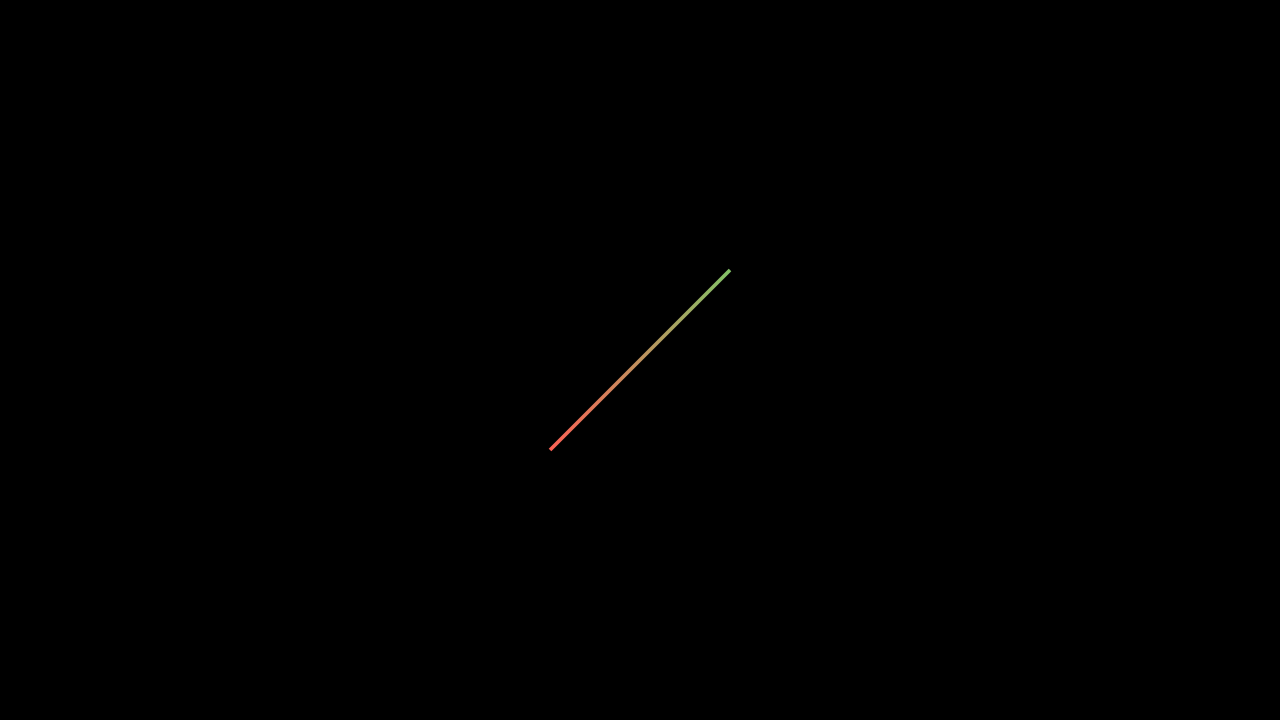

In [18]:
%%manim -v WARNING -qm Foolery3

def interpolate_color_with_midpoint(color1, color2, midpoint, midpoint_val, alpha):
    if alpha < midpoint_val:
        return interpolate_color(color1, midpoint, alpha / midpoint_val)
    else:
        return interpolate_color(midpoint, color2, (alpha - midpoint_val) / (1 - midpoint_val))

class Foolery3(Scene):
    def construct(self):
        # resistor = ResistorElement(LEFT, RIGHT, 0.5, 6)
        resistor = Line(UP + RIGHT, DOWN + LEFT, sheen_direction=UP + RIGHT)
        # resistor = Resistor(RIGHT, LEFT, do_colored_voltage=True, base_v=0, diff_v=1)
        resistor.set_color((RED, GREEN))
        self.add(resistor)


In [11]:
%%manim -v WARNING -qm Foolery4

class Foolery4(Scene):
    def construct(self):
        x = ValueTracker(-0.5)
        arrow = Arrow()
        arrow.add_updater(lambda a: a.move_to(x.get_value() * RIGHT))

        label = Text("I")
        label.add_updater(lambda l: l.next_to(arrow, UP))

        self.play(FadeIn(arrow), FadeIn(label), x.animate.set_value(0))
        self.wait()

        self.clear()

        x.set_value(-0.5)

        arrow = Arrow(DOWN, UP)
        arrow.add_updater(lambda a: a.move_to(x.get_value() * UP))

        label = Text("I")
        label.add_updater(lambda l: l.next_to(arrow, RIGHT))

        self.play(FadeIn(arrow), FadeIn(label), x.animate.set_value(0))
        self.wait()


In [ ]:
from scipy.integrate import solve_ivp

Nodal Analysis Test

In [62]:
x = 1
w = 1
A = 3

# Constants
N = 9
V = 7
I = 2
S = 2

r = np.array(
    [[x],
     [w]]
)

# y = np.array(
#     [[x],
#      [5],
#      [4],
#      [0],
#      [0],
#      [0],
#      [0],
#      [w],
#      [6]]
# )
r_to_y = np.array(
    [[1, 0],
     [0, 0],
     [0, 0],
     [0, 0],
     [0, 0],
     [0, 0],
     [0, 0],
     [0, 1],
     [0, 0]]
)
sources = np.array(
    [[0],
     [5],
     [4],
     [0],
     [0],
     [0],
     [0],
     [0],
     [6]]
)
y = r_to_y @ r + sources


G = np.array(
    [[0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 0],
     [0, 1, 1, 0, 1, 1, 0, 0, 1],
     [0, 0, 1, 0, 0, 1, 0, 0, 1]]
)
NA = np.array(
    [[0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, -1/4, 0, 0, 1/4, 0, 0],
     [0, 0, 0, 0, -5/6, 1/2, 0, 1/3, 0],
     [0, 0, 0, 0, 1/2, -1/2, 0, 0, 0],
     [0, 0, 0, 1/4, 0, 0, -1/4, 0, 0],
     [0, 0, 0, 0, 1/3, 0, 0, -1/3, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0]]
)
super_nodes = np.array(
    [[1, 1, 1, 1, 1, 1, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 1, 1, 0]]
)

D = np.array(
    [[0, -1, 0, 0, 1, 0, 0, 0, 0],
     [-1, 0, 0, 1, 0, 0, 0, 0, 0],
     [0, 0, -1, 0, 0, 1, 0, 0, 0],
     [0, A, 0, 0, -A, -1, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, -1, 1, 0],
     [-1, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, -1, 1, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, -1/4, -1/3, 0, 1/4, 1/3, 0],
     [1, 0, 0, 0, 0, 0, 0, 0, 0]]
)

# print(D)
# print(D.shape)
D_inv = np.linalg.inv(D)
# print(D_inv)

T = np.array(
    [[0, 0],
     [0, 0],
     [0, 0],
     [1, 0],
     [-1, 0],
     [0, 0],
     [0, 0],
     [0, 1],
     [0, -1]]
)
Tprime = np.array(
    [[0, -1]]
)
assert np.all(Tprime == (super_nodes @ T)[:-1])
temp1 = np.identity(N)
temp1[-2, -I:] = -Tprime
temp1[-1, -1] = 0

b = temp1 @ y
k = D_inv @ b

F = G @ NA
Fprime = G @ T

temp2 = np.concatenate((np.zeros((I, V)), np.identity(I)), axis=1)
ibar = F @ k + Fprime @ temp2 @ y

vbar = -T.T @ k
vbar


Rv = 1
Ri = 1
C = np.array([1])
L = np.array([5])
temp3 = np.zeros((Rv + Ri, Rv))
temp4 = np.zeros((Ri, Ri))
np.fill_diagonal(temp3, C)
np.fill_diagonal(temp4, L)
temp4 = np.concatenate((np.zeros((Rv, Ri)), temp4))
temp5 = np.concatenate((temp3, np.zeros((Rv + Ri, V + I - Rv - Ri)), temp4), axis=1)
temp5

temp6 = np.zeros((V + I, V))
np.fill_diagonal(temp6, 1)

temp7 = np.concatenate((np.zeros((V, I)), np.identity(I)))
temp8 = np.concatenate((np.zeros((I, V)), np.identity(I)), axis=1)

A = temp5 @ (temp6 @ (G @ NA @ D_inv @ temp1 - G @ T @ temp8) - temp7 @ T.T @ D_inv @ temp1)
e = A @ sources
A = A @ r_to_y
rdot = A @ r + e
rdot


array([[  6.5],
       [-30. ]])

In [61]:
r_to_y @ A

array([[-0.64285714,  0.14285714,  0.5       ,  0.        ,  0.14285714,
        -0.14285714,  0.5       ,  1.        ,  0.57142857],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [12.14285714, -2.14285714,  5.        ,  5.        , -2

In [32]:
print((super_nodes @ NA)[-2])
print(D[-2])
(super_nodes @ NA)[-2] == D[-2]


[ 0.          0.          0.         -0.25       -0.33333333  0.
  0.25        0.33333333  0.        ]
[ 0.          0.          0.         -0.25       -0.33333333  0.
  0.25        0.33333333  0.        ]


array([ True,  True,  True,  True, False,  True,  True,  True,  True])

In [1]:
from circuits import approx as apx

circuit = apx.ApproxCircuit(9)
circuit.add_wire(0, 1)
circuit.add_wire(1, 2)
circuit.add_voltage_source(5, 3, 0)
circuit.add_capacitor(1, 4, 1)
circuit.add_voltage_source(4, 5, 2)
circuit.add_inductor(5, 4, 3)
circuit.add_resistor(2, 5, 4)
circuit.add_resistor(4, 6, 3)
circuit.add_resistor(3, 7, 4)
circuit.add_dependant_voltage_source(3, 8, 5, 4, 1)
circuit.add_wire(7, 6)
circuit.add_current_source(6, 8, 7)

ts, rs, vs = circuit.solve((0, 10))

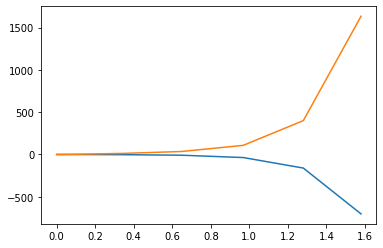

In [7]:
import matplotlib.pyplot as plt

plt.plot(ts[:10], rs.T[:10])
plt.show()